<a href="https://colab.research.google.com/github/vaniseth/Federated-Learning/blob/main/Federated_Keras_MNIST_model_using_OpenFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.7 kB/s 
     |████████████████████████████████| 438 kB 50.4 MB/s 
     |████████████████████████████████| 5.8 MB 49.2 MB/s 
     |████████████████████████████████| 1.6 MB 39.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
!pip install openfl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 535 kB 4.9 MB/s 
     |████████████████████████████████| 146 kB 57.2 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 4.0 MB 49.0 MB/s 
     |████████████████████████████████| 161 kB 52.3 MB/s 
     |████████████████████████████████| 4.1 MB 35.8 MB/s 
     |████████████████████████████████| 2.5 MB 43.6 MB/s 
     |████████████████████████████████| 200 kB 57.3 MB/s 
     |████████████████████████████████| 596 kB 57.7 MB/s 
     |████████████████████████████████| 125 kB 56.5 MB/s 
     |████████████████████████████████| 8.8 MB 48.1 MB/s 
     |████████████████████████████████| 51 kB 6.3 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 9.7 MB 30.4 MB/s 
     |████████████████████████████████| 344 kB 42.2 MB/s 
     |████████████████████████████████

In [ ]:
import openfl.native as fx
from openfl.federated import FederatedModel,FederatedDataSet

#importing OpenFL and it's required libraries

In [ ]:
!pip install intel-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 232.6 MB 65 kB/s 
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0+zzzcolab20220506150900 requires keras<2.8,>=2.7.0rc0, but you have keras 2.9.0 which is incompatible.
tensorflow 2.7.0+zzzcolab20220506150900 requires tensorflow-esti

In [ ]:
def test_intel_tensorflow():
    """
    Check if Intel version of TensorFlow is installed
    """
    import tensorflow as tf

    print("We are using Tensorflow version {}".format(tf.__version__))

    major_version = int(tf.__version__.split(".")[0])
    if major_version >= 2:
        from tensorflow.python.util import _pywrap_util_port
        print("Intel-optimizations (DNNL) enabled:",
              _pywrap_util_port.IsMklEnabled())
    else:
        print("Intel-optimizations (DNNL) enabled:")

test_intel_tensorflow()

We are using Tensorflow version 2.9.1
Intel-optimizations (DNNL) enabled: False


In [ ]:
fx.init('keras_cnn_mnist')

Creating Workspace Directories
Creating Workspace Templates

New workspace directory structure:
workspace
├── cert
├── plan
│   ├── data.yaml
│   ├── defaults
│   ├── cols.yaml
│   └── plan.yaml
├── src
│   ├── keras_cnn.py
│   ├── mnist_utils.py
│   ├── __init__.py
│   └── tfmnist_inmemory.py
├── logs
├── .workspace
├── save
├── data
└── requirements.txt

6 directories, 10 files
Setting Up Certificate Authority...

1.  Create Root CA
1.1 Create Directories
1.2 Create Database
1.3 Create CA Request and Certificate
2.  Create Signing Certificate
2.1 Create Directories
2.2 Create Database
2.3 Create Signing Certificate CSR
2.4 Sign Signing Certificate CSR
3   Create Certificate Chain

Done.
Creating AGGREGATOR certificate key pair with following settings: CN=187c9ce15195, SAN=DNS:187c9ce15195
  Writing AGGREGATOR certificate key pair to: /content/cert/server
The CSR Hash for file server/agg_187c9ce15195.csr = df50cd64f952b62c286a3f17ae2f893a30aa327129458af05071cda11475f29b2fe22eb7356882d

In [ ]:
''' After importing the required packages, we then setup our openfl workspace. fx.init() command is used
to setup a deafult workspace.
'''

Now we are ready to define our datatset and model to perform federated learning on it. We will start with a fully connected model that is trained on the MNIST dataset.

In [ ]:
#Import and process training, validation, and test images/labels

# Set the ratio of validation imgs, can't be 0.0
VALID_PERCENT = 0.3

(X_train, y_train), (X_test, y_test) = mnist.load_data()
split_on = int((1 - VALID_PERCENT) * len(X_train))

train_images = X_train[0:split_on,:,:]
train_labels = to_categorical(y_train)[0:split_on,:]

valid_images = X_train[split_on:,:,:]
valid_labels = to_categorical(y_train)[split_on:,:]

test_images = X_test
test_labels = to_categorical(y_test)

def preprocess(images):
    #Normalize
    images = (images / 255) - 0.5
    #Flatten
    images = images.reshape((-1, 784))
    return images

# Preprocess the images.
train_images = preprocess(train_images)
valid_images = preprocess(valid_images)
test_images = preprocess(test_images)

feature_shape = train_images.shape[1]
classes = 10

fl_data = FederatedDataSet(train_images,train_labels,valid_images,valid_labels,batch_size=32,num_classes=classes)

def build_model(feature_shape,classes):
    #Defines the MNIST model
    model = Sequential()
    model.add(Dense(64, input_shape=feature_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],)
    return model

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
''' The code starts by importing the MNIST dataset. It then splits the images into training and validation
sets, using the ratio of 0.3 for validation images.

The code then loads the data and preprocesses it to 
make sure that all feaures are normalized beofre building a ML model with a single hidden layer of 64 
nerurons with relu (rectified linear) activation function.
This activation function will give the output as input directly if it is positie otherwise the output will
be zero.

The code then defines a model which has one input layer and two dense layers. The first dense layer is used
as input to the second dense layer which is used as an input to the softmax activation function.

The code the finally builds a model for the MNIST dataset.
'''

In [ ]:
#Create a federated model using the build model function and dataset
fl_model = FederatedModel(build_model,data_loader=fl_data)

The FederatedModel object is a wrapper around your Keras, Tensorflow or PyTorch model that makes it compatible with openfl. It provides built in federated training and validation functions that we will see used below. Using it's setup function, collaborator models and datasets can be automatically defined for the experiment.

In [ ]:
collaborator_models = fl_model.setup(num_collaborators=2)
collaborators = {'one':collaborator_models[0],'two':collaborator_models[1]}
#, 'three':collaborator_models[2]}

#the code creates two models for the two collaborators.

In [ ]:
#Original MNIST dataset
print(f'Original training data size: {len(train_images)}')
print(f'Original validation data size: {len(valid_images)}\n')

#Collaborator one's data
print(f'Collaborator one\'s training data size: {len(collaborator_models[0].data_loader.X_train)}')
print(f'Collaborator one\'s validation data size: {len(collaborator_models[0].data_loader.X_valid)}\n')

#Collaborator two's data
print(f'Collaborator two\'s training data size: {len(collaborator_models[1].data_loader.X_train)}')
print(f'Collaborator two\'s validation data size: {len(collaborator_models[1].data_loader.X_valid)}\n')

#Collaborator three's data
#print(f'Collaborator three\'s training data size: {len(collaborator_models[2].data_loader.X_train)}')
#print(f'Collaborator three\'s validation data size: {len(collaborator_models[2].data_loader.X_valid)}')


Original training data size: 42000
Original validation data size: 18000

Collaborator one's training data size: 21000
Collaborator one's validation data size: 9000

Collaborator two's training data size: 21000
Collaborator two's validation data size: 9000



In [ ]:
#Get the current values of the plan. Each of these can be overridden
print(fx.get_plan())

{
    "aggregator.settings.best_state_path": "save/keras_cnn_mnist_best.pbuf",
    "aggregator.settings.db_store_rounds": 2,
    "aggregator.settings.init_state_path": "save/keras_cnn_mnist_init.pbuf",
    "aggregator.settings.last_state_path": "save/keras_cnn_mnist_last.pbuf",
    "aggregator.settings.rounds_to_train": 10,
    "aggregator.settings.write_logs": false,
    "aggregator.template": "openfl.component.Aggregator",
    "assigner.settings.task_groups": [
        {
            "name": "train_and_validate",
            "percentage": 1.0,
            "tasks": [
                "aggregated_model_validation",
                "train",
                "locally_tuned_model_validation"
            ]
        }
    ],
    "assigner.template": "openfl.component.RandomGroupedAssigner",
    "collaborator.settings.db_store_rounds": 1,
    "collaborator.settings.delta_updates": false,
    "collaborator.settings.opt_treatment": "RESET",
    "collaborator.template": "openfl.component.Collaborat

Now we are ready to run our experiment. If we want to pass in custom plan settings, we can easily do that with the override_config parameter

In [ ]:
#Run experiment, return trained FederatedModel
final_fl_model = fx.run_experiment(collaborators,override_config={'aggregator.settings.rounds_to_train':5})


282/282 [==============================] - 1s 3ms/step - loss: 0.1763 - accuracy: 0.9489


In [ ]:
#Save final model and load into keras
final_fl_model.save_native('final_model')
model = tf.keras.models.load_model('./final_model')

In [ ]:
#Test the final model on our test set
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1421 - accuracy: 0.9550


[0.14210066199302673, 0.9549999833106995]

The code creates a list if collaborators and an override_config dictionary with settings for the FL experiment.

The code then runds the experiment which returns a trained Federated model object that can be saved to disk or loaded into Keras.

The final step is to evaluate the model on the test set.

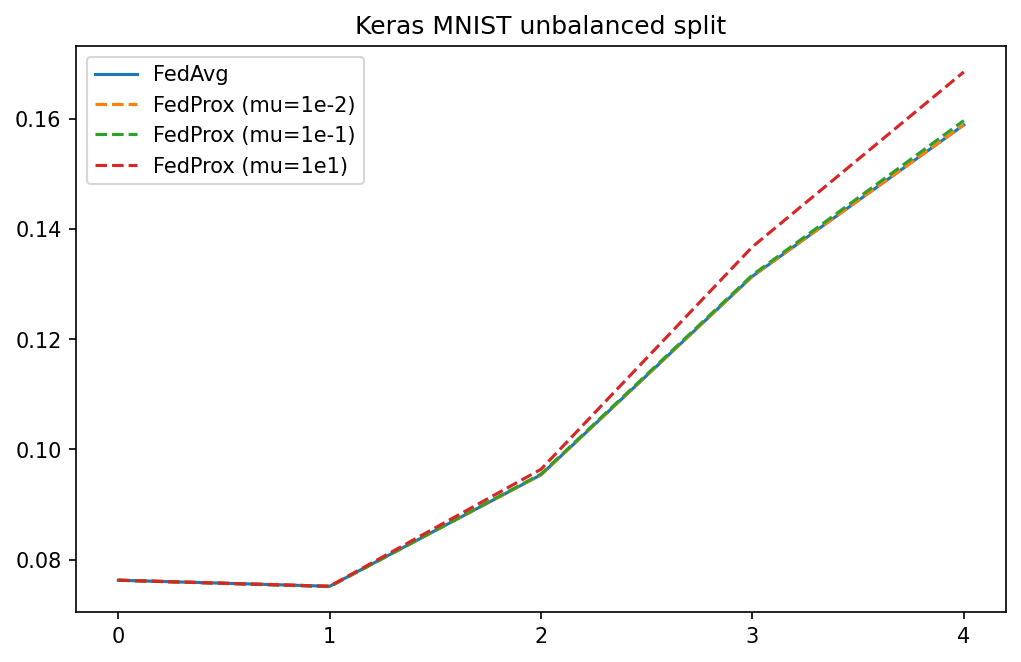

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5), dpi=150)
plt.title('Keras MNIST unbalanced split')
plt.plot([0.07627802075538784, 0.07518334008473902, 0.09541350667830556, 0.13141966053564103, 0.15887578643299638], label='FedAvg')
plt.plot([0.07627802075538784, 0.07518334008473902, 0.09541350667830556, 0.1314459763141349, 0.15887578643299638], linestyle='--', label='FedProx (mu=1e-2)')
plt.plot([0.07627802075538784, 0.0751056043850258, 0.09555227747093886, 0.131649036151357, 0.15966261748969554], linestyle='--', label='FedProx (mu=1e-1)')
plt.plot([0.07627802075538784, 0.07517912408802659, 0.09641592293512076, 0.13676991989742965, 0.1684917744528502], linestyle='--', label='FedProx (mu=1e1)')

plt.legend()
plt.xticks(range(5))
plt.show()

The plot shows the difference between balanced and unbalanced split of the Keras MNIST dataset when different aggreagtion algoirthms for OpenFL is used. 